<a href="https://colab.research.google.com/github/PedroHeeger/boot/blob/teste/dio/dados_unimed_1/02-curso_python/21-machine_learning/21_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 21: Machine Learning - Projeto Covid-19**

## 2) Importando informações do CSV


Primeiro vamos importar algumas das bibliotecas necessárias para nosso porjeto de hoje.

In [5]:
# Importando o pandas, numpy
import pandas as pd
import numpy as np
from datetime import datetime
import re
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

## 3) Formatando as informações importadas

In [3]:
# vamos importar os dados para o projeto
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

In [9]:
# Criando o Dataframe a partir do arquivo csv
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [24]:
# Verificando os tipos de cada coluna
df.dtypes

sno                         int64
observationdate    datetime64[ns]
provincestate              object
countryregion              object
lastupdate         datetime64[ns]
confirmed                 float64
deaths                    float64
recovered                 float64
dtype: object

Nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais. Vamos implementar uma função para fazer a limpeza dos nomes dessas colunas.

In [11]:
# Importando a biblioteca regular expression (re)
import re

In [12]:
# Criando uma função para corrigir as colunas
def corrige_colunas(col_name):
  return re.sub(r"[/| ]", "", col_name).lower()

In [10]:
# Testando a função
corrige_colunas("AdgE/P ou")

'adgepou'

In [13]:
# Verificando o nome de todas as colunas do Dataframe
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [14]:
# Corrigindo o nome de todas as colunas do Dataframe
df.columns = [corrige_colunas(col) for col in df.columns]

In [15]:
# Verificando o nome de todas as colunas do Dataframe
df.columns

Index(['sno', 'observationdate', 'provincestate', 'countryregion',
       'lastupdate', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

In [16]:
# Verificando o Dataframe
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


## 4) Criando o primeiro gráfico dos dados selecionados

### Brasil
Vamos selecionar apenas os dados do Brasil para investigar

In [ ]:
# Verificando quais são os dados da coluna país
df.countryregion.unique()

In [18]:
# Filtrando Brasil na coluna país
df_br = df.loc[df.countryregion == 'Brazil']
df_br

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [17]:
# Filtrando Brasil na coluna país e na coluna confirmed maior que zero o número de casos
brasil = df.loc[(df.countryregion == "Brazil") & (df.confirmed > 0)]
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


##### Casos Confirmados

In [21]:
# Gráfico da evolução de casos confirmados
px.line(brasil, 'observationdate', 'confirmed', title='Casos confirmados no Brasil')

## 5) Usando lambda para identificar novos casos confirmados por dia

### Novos casos por dia

In [48]:
# Verificando os tipos de dados das colunas
brasil.dtypes

sno                         int64
observationdate    datetime64[ns]
provincestate              object
countryregion              object
lastupdate         datetime64[ns]
confirmed                 float64
deaths                    float64
recovered                 float64
dtype: object

In [49]:
# Técnica de programação funcional: A função map fará com que a função lambda (função anônima) seja executada em um arranjo da quantidade de linhas do Dataframe brasil (84 linhas)
# como retorna um iterador, tem que ser armazenado em uma lista. Então essa função será executada em cada linha, onde x é cada índice da linha determinado pelo arranjo.
brasil['newcases'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
# Exibindo o Dataframe com a nova coluna
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,newcases
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [51]:
# Criando um gráfico de casos por dia
px.line(brasil, x='observationdate', y='newcases', title='Novos casos por dia')

## 6) Cálculos de taxa de crescimento médio de casos confirmados no Brasil

### Mortes

In [52]:
# Criando um gráfico de número de mortes por dia
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
               mode='lines+markers', line={'color':'red'})
)

# Layout
fig.update_layout(title='Mortes por COVID-19 no Brasil')
fig.show()

### Taxa de Crescimento
Fórmula: taxa_crescimento = (presente/passado)**(1/n) - 1

In [59]:
# Criando uma função de taxa de crescimento
def taxa_crescimento(data, variable, date_start=None, date_end=None):
  # Se data início for None, define como a primeira data disponível
  if date_start == None:
    date_start = data['observationdate'].loc[data[variable] > 0].min()
    print(date_start)
  else:
    date_start = pd.to_datetime(date_start)
    print(date_start)
  
  if date_end == None:
    date_end = data.observationdate.iloc[-1]
    print(date_end)
  else:
    date_end = pd.to_datetime(date_end)
    print(date_end)

  # Define os valores do presente e passado
  passado = data.loc[data.observationdate == date_start, variable].values[0]
  presente = data.loc[data.observationdate == date_end, variable].values[0]

  # Define o número de pontos no tempo que vamos avaliar
  n = (date_end - date_start).days

  # Calcular a taxa
  taxa = (presente/passado)**(1/n) - 1

  return taxa*100

In [60]:
# Taxa de crescimento médio do COVID no Brasil em todo o período
taxa_crescimento(brasil, 'confirmed')

2020-02-26 00:00:00
2020-05-19 00:00:00


16.27183353112116

## 7) Estabelecendo a taxa de crescimento diário

In [65]:
# Criando uma função de taxa de crescimento diária
def taxa_crescimento_diaria(data, variable, date_start=None):
  # Se data início for None, define como a primeira data disponível
  if date_start == None:
    date_start = data['observationdate'].loc[data[variable] > 0].min()
    print(date_start)
  else:
    date_start = pd.to_datetime(date_start)
    print(date_start)
  
  date_end = data.observationdate.max()
  # Define o número de pontos no tempo que vamos avaliar
  n = (date_end - date_start).days

  # Taxa calculada de um dia para o outro
  taxas = list(map(
      lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
      range(1, n+1)
  ))
  return np.array(taxas) * 100

In [66]:
# Verificando as taxas de casos confirmados por dia
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')
tx_dia

2020-02-26 00:00:00


array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [68]:
# Construindo o gráfico de linha das taxas de casos confirmados por dia
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title="Taxa de crescimento de casos confirmados no Brasil", labels={"x": "Dias", "y": "Taxas"})


## 8) Realizando cálculos de predições

### Predições

In [72]:
# Importando as bibliotecas statsmodels e matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [18]:
# Criando um Dataframe com as datas e os casos confirmados
confirmados = brasil.confirmed
confirmados.index = brasil["observationdate"]
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [19]:
# Decomposição
res = seasonal_decompose(confirmados)

<function matplotlib.pyplot.show(*args, **kw)>

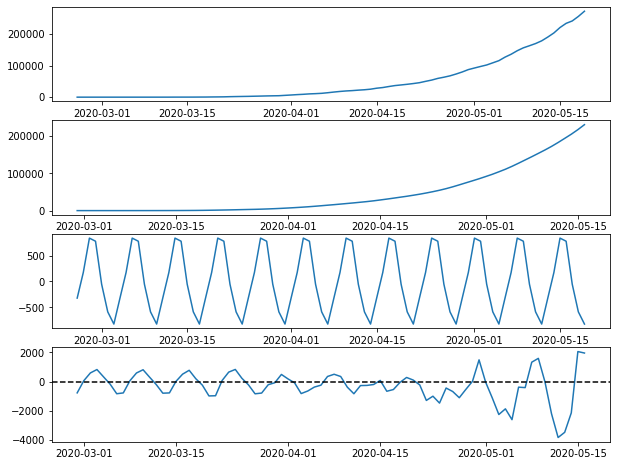

In [20]:
# Criando um gráfico
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show

## 9) Modelando os dados com biblioteca ARIMA

In [6]:
# Instalando a biblioteca arima
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Importando a biblioteca arima
from pmdarima.arima import auto_arima

In [21]:
# Criando o modelo
modelo = auto_arima(confirmados)

In [24]:
# Criando o gráfico
fig = go.Figure(go.Scatter(
      x=confirmados.index, y=confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name="Preditos"
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 31 dias')
fig.show()

* O modelo nos deu uma estimativa de que os casos irão de 271Mil casos em 19/05/2020 para +-852mil em 19/16/2020.   
* Para os casos já ocorridos linha azul, o modelo conseguiu performar muito bem na predição(linha vermelha).   
* Quanto maior o período menor a performance do modelo, lembrando que estamos estimando o período de 31 dias.   

## 10) Modelo de crescimento com biblioteca fbprophet

In [25]:
# Instalando a biblioteca pystan e fbprophet
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 112 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638996 sha256=2fef2b8efba87770196be02b1d7cad76dc87413e26205b144798549520b7d1b6
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [26]:
# Importando a biblioteca fbprophet
from fbprophet import Prophet

In [31]:
# Verificando o Dataframe confirmados
confirmados # Total = 84 (0 à 83)

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [28]:
# Preprocessamentos
train = confirmados.reset_index()[:-5]     # Do primeiro até o início dos cinco últimos (0 à 78)
test = confirmados.reset_index()[-5:]      # Do quinto último até o útimo (79 à 83)

In [29]:
# Renomeando colunas
train.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)
test.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)

In [30]:
# Verificando o Dataframe train (confirmados até 78)
train

,ds,y
0,2020-02-26,1.0
1,2020-02-27,1.0
2,2020-02-28,1.0
3,2020-02-29,2.0
4,2020-03-01,2.0
...,...,...
74,2020-05-10,162699.0
75,2020-05-11,169594.0
76,2020-05-12,178214.0
77,2020-05-13,190137.0


In [32]:
# Verificando o Dataframe test (confirmados de 79 até 83)
test

,ds,y
79,2020-05-15,220291.0
80,2020-05-16,233511.0
81,2020-05-17,241080.0
82,2020-05-18,255368.0
83,2020-05-19,271885.0


In [53]:
# Definir o modelo de crescimento
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

# Definindo a capacidade que é igual a população do Brasil (211.463.256)
# pop = 211463256
pop = 1000000
train['cap']=pop

# Treina o modelo
profeta.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
# Construir previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

In [55]:
# Criando o gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.ds, y=test.y, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil para População de 1M no período de 200 dias')
fig.show()

In [56]:
# Definir o modelo de crescimento
profeta2 = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

# Definindo a capacidade que é igual a população do Brasil (211.463.256)
# pop = 211463256
pop = 1500000
train['cap']=pop

# Treina o modelo
profeta2.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
# Construir previsões para o futuro
future_dates = profeta2.make_future_dataframe(periods=40)
future_dates['cap'] = pop
forecast = profeta2.predict(future_dates)

In [58]:
# Criando o gráfico
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.ds, y=test.y, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil para População de 1,5M no período de 40 dias')
fig.show()